In [15]:
import pandas as pd
import matplotlib.pyplot as plt

import sqlalchemy

from mplsoccer import Pitch
from sqlalchemy import create_engine, text

In [21]:
def db_conn(_username, _password, _host, _port, _database) : 
    db_engine = sqlalchemy.engine.URL.create(
        drivername = "mysql+pymysql",
        username = _username,
        password = _password,
        host = _host,
        port = _port,
        database = _database,
    )

    return create_engine(db_engine)

In [22]:
def shoot_time_convert(_shoot_time) :
    half_time_interval = 2**24

    if 0 <= _shoot_time < half_time_interval:
        converted_time = _shoot_time
        
    elif half_time_interval <= _shoot_time < 2 * half_time_interval:
        converted_time = _shoot_time - half_time_interval + 45 * 60
        
    elif 2 * half_time_interval <= _shoot_time < 3 * half_time_interval:
        converted_time = _shoot_time - 2 * half_time_interval + 90 * 60
        
    elif 3 * half_time_interval <= _shoot_time < 4 * half_time_interval:
        converted_time = _shoot_time - 3 * half_time_interval + 105 * 60
        
    elif 4 * half_time_interval <= _shoot_time < 5 * half_time_interval:
        converted_time = _shoot_time - 4 * half_time_interval + 120 * 60

    return converted_time # 초 단위 

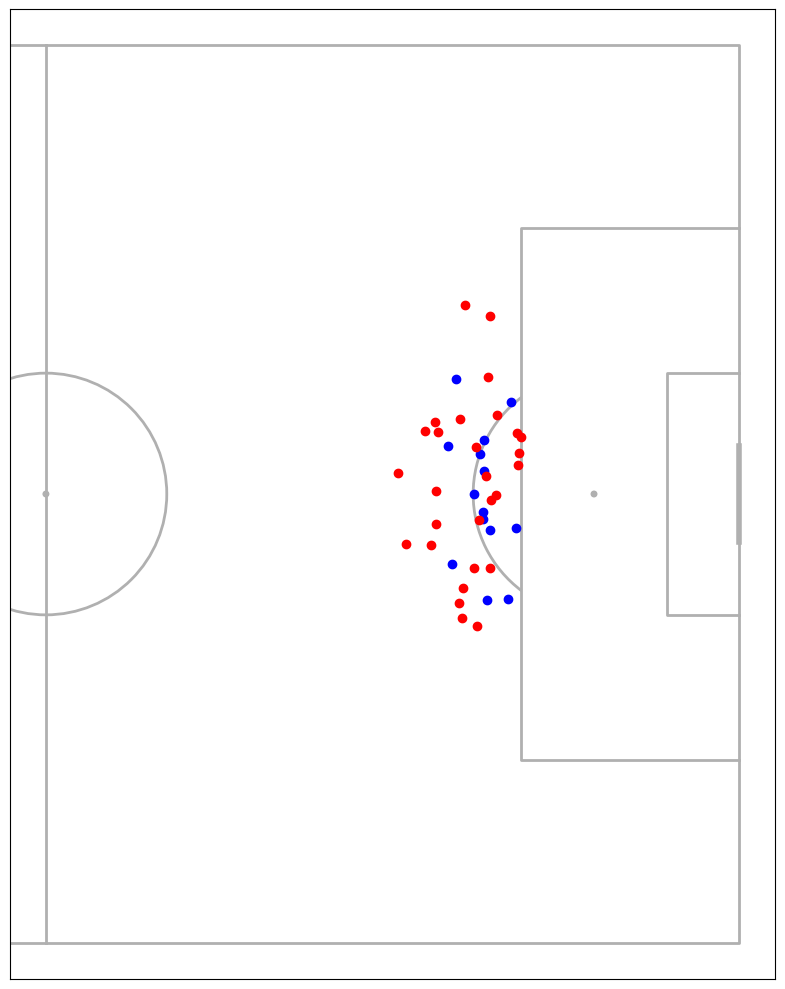

In [24]:
engine = db_conn('root', 'Dhyoon96!', 'localhost', 3306, 'side_proj_fco')
df_query = 'SELECT * FROM shoot_user_detail WHERE shoot_inpenalty = 0'

# Use the connection to read the SQL query into a DataFrame
with engine.connect() as connection:
    shoot_detail_df = pd.read_sql(df_query, con = connection)

shoot_detail_df_inpenalty = shoot_detail_df
# shoot_detail_df_inpenalty = shoot_detail_df[(shoot_detail_df['shoot_inpenalty'] == False)]

blue_shots = shoot_detail_df_inpenalty[(shoot_detail_df_inpenalty['shoot_result'] == 3)]
red_shots = shoot_detail_df_inpenalty[(shoot_detail_df_inpenalty['shoot_result'] == 1) | (shoot_detail_df_inpenalty['shoot_result'] == 2)]

pitch = Pitch(pitch_type='metricasports', 
              pitch_length=105, pitch_width=68,
              axis=True, half = True)

fig, ax = pitch.draw(figsize=(10, 10))

# Plot blue shots
pitch.scatter(blue_shots['shoot_position_x'], blue_shots['shoot_position_y'], color='blue', ax=ax)

# Plot red shots
pitch.scatter(red_shots['shoot_position_x'], red_shots['shoot_position_y'], color='red', ax=ax)

plt.show()

